## 异常值检测

In [4]:
# -*- coding:utf-8 -*-
import pandas as pd

In [5]:
catering_sale = 'C:/Users/qyn/Desktop/新建学习/Python数据分析与挖掘实战/chapter3/demo/data/catering_sale.xls'
data = pd.read_excel(catering_sale, index_col=u'日期')

In [7]:
import matplotlib.pyplot as plt
# pylot使用rc配置文件来自定义图形的各种默认属性，称之为rc配置或rc参数。通过rc参数可以修改默认的属性，包括窗体大小、每英寸的点数、线条宽度、颜色、样式、坐标轴、坐标和网络属性、文本、字体等。
# rc参数存储在字典变量中，通过字典的方式进行访问
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False   #　用来正常显示负号   

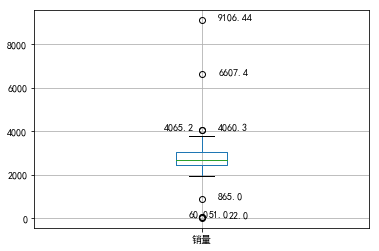

In [17]:
plt.figure()
p = data.boxplot(return_type='dict')    # 画箱线图，直接使用DataFrame的方法:    需指定返回p的类型，否则报错误：TypeError: 'AxesSubplot' ...
x = p['fliers'][0].get_xdata()         # 'files'为异常值标签
y = p['fliers'][0].get_ydata()
y.sort()                             # 从小到大排序，该方法直接改变原对象

for i in range(len(x)):
    if i > 0:
        plt.annotate(y[i], xy = (x[i], y[i]), xytext = (x[i] + 0.05 - 0.8/ (y[i]- y[i - 1]),y[i]))
    else:
        plt.annotate(y[i], xy = (x[i], y[i]), xytext = (x[i] + 0.08, y[i]))

plt.show()